In [28]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv("full_data.csv")
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [31]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [32]:
data.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  0.08   0             0              No            children       Urban           139.67             14.1  Unknown          0         1
Male    17.00  0             0              No            Private        Rural           94.92              23.5  never smoked     0         1
                                                                         Urban           85.07              21.1  never smoked     0         1
                                                                                         71.58              25.6  Unknown          0         1
                                                                                         63.28              40.2  Unknown          0         1
                                                                                                                                            ..
Fema

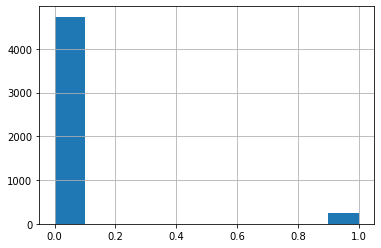

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
data["stroke"].hist()
plt.show()

In [34]:
data["gen"]=pd.get_dummies(data.gender.values,drop_first=True)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data["Residence_type"]=encode.fit_transform(data["Residence_type"])
data["smoking_status"]=encode.fit_transform(data["smoking_status"])
data["work_type"]=encode.fit_transform(data["work_type"])

In [35]:
data.drop(["ever_married","gender","hypertension","work_type","Residence_type"],axis=1,inplace=True)


data.head()

,age,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gen
0,67.0,1,228.69,36.6,1,1,1
1,80.0,1,105.92,32.5,2,1,1
2,49.0,0,171.23,34.4,3,1,0
3,79.0,0,174.12,24.0,2,1,0
4,81.0,0,186.21,29.0,1,1,1


In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
a=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for st_tr , st_te in a.split(data,data["stroke"]):
    train_set = data.loc[st_tr]
    test_set = data.loc[st_te]

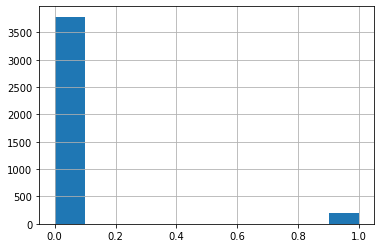

In [37]:
train_set["stroke"].hist()
plt.show()

In [38]:
y_train= train_set["stroke"]
train_set.drop(["stroke"],axis=1,inplace=True)
y_test= test_set["stroke"]

test_set.drop(["stroke"],axis=1,inplace=True)

train_set=train_set.to_numpy()
test_set=test_set.to_numpy()

#x = data.to_numpy()


In [39]:
from sklearn.preprocessing import MinMaxScaler as scale
scaler = scale()
scaler.fit_transform(train_set)

array([[0.29199219, 0.        , 0.62485892, 0.31232092, 1.        ,
        0.        ],
       [0.03564453, 0.        , 0.14700903, 0.252149  , 0.        ,
        1.        ],
       [0.84130859, 0.        , 0.26504891, 0.65902579, 1.        ,
        0.        ],
       ...,
       [0.64599609, 0.        , 0.02657073, 0.42120344, 1.        ,
        0.        ],
       [0.53613281, 0.        , 0.14592739, 0.20916905, 0.66666667,
        0.        ],
       [0.54833984, 0.        , 0.1660553 , 0.73638968, 1.        ,
        1.        ]])

In [40]:
train_set.shape

(3984, 6)

In [41]:
model = keras.Sequential([
    #ann
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(100,activation= "relu"),
    
    keras.layers.Dense(55,activation= "relu"),
    keras.layers.Dense(33,activation= "relu"),
    
    keras.layers.Dense(11,activation= "relu"),
    
    keras.layers.Dense(7,activation= "relu"),

    keras.layers.Dense(2,activation= "sigmoid"),
])

In [42]:
model.compile(optimizer= "adam",loss = "sparse_categorical_crossentropy", metrics= [ "accuracy"])

In [43]:
model.fit(train_set,y_train,epochs= 50)

Epoch 1/50
125/125 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9385
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1992 - accuracy: 0.9503
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1855 - accuracy: 0.9503
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.9503
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9503
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9503
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9503
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9503
Epoch 9/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.9503
Epoch 10/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9503

In [44]:
model.evaluate(test_set,y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9498


[0.16218842566013336, 0.949849545955658]

In [49]:
test_set[1]

array([ 49.  ,   0.  , 107.91,  25.  ,   0.  ,   0.  ])

In [48]:
model.predict(test_set)

32/32 [==============================] - 0s 2ms/step


array([[0.80659664, 0.13229272],
       [0.7573602 , 0.20016424],
       [0.935807  , 0.02303815],
       ...,
       [0.83425814, 0.09643468],
       [0.954549  , 0.0110783 ],
       [0.87816125, 0.0378979 ]], dtype=float32)